In [3]:
!pwd

/kaggle/working


In [4]:
import os 
import numpy as np

In [5]:
file_path = '/kaggle/input/ahmethan/labels1.npy'
labels_data = np.load(file_path, allow_pickle=True)

In [6]:
labels_data[5494]

array([[2.      , 0.28125 , 0.490385, 0.100962, 0.206731],
       [2.      , 0.170673, 0.234375, 0.057692, 0.064904],
       [7.      , 0.361779, 0.117788, 0.050481, 0.081731]], dtype=float32)

In [7]:
image_list = os.listdir('/kaggle/input/dataset-vehicle1/images')
images_path = sorted(image_list)

In [8]:
image_list[0]

'Highway_143_2020-07-30_jpg.rf.a7076f71b722e151bc3533a818aea182.jpg'

In [9]:
images_path = sorted(image_list)

In [10]:
print(images_path[5694])

train.txt


In [11]:
images_path.remove(images_path[5694])## this file reomve 
# because it is not an image as shown in the cell above 
# .txt

In [12]:
print(images_path[5694])

ulu0_jpg.rf.fa56a0f31c0eb2390fe1096028be63e4.jpg


Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg

In [13]:
import cv2

# Assuming you have a list of image file paths

# Load images and associate labels
labeled_images = {}

for i, image_path in enumerate(images_path):
    new_dir = '/kaggle/input/dataset-vehicle1/images'+'/'+image_path
    image = cv2.imread(new_dir)
    label = labels_data[i] 
#     elif i >= 5694:
#         image = cv2.imread(image_path)
#         label = labels[i+1]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}


In [14]:
print(labeled_images['Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'])

{'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[6, 0, 2],
        [4, 0, 0],
        [6, 1, 0],
        ...,
        [0, 8, 1],
        [0, 4, 0],
        [0, 5, 0]],

       [[7, 1, 6],
        [2, 0, 1],
        [7, 3, 2],
        ...,
        [0, 6, 3],
        [0, 3, 1],
        [0, 3, 0]],

       [[6, 2, 7],
        [2, 0, 1],
        [6, 4, 4],
        ...,
        [0, 1, 0],
        [0, 2, 0],
        [0, 2, 0]]], dtype=uint8), 'label': array([[3.      , 0.509804, 0.411765, 0.107843, 0.245098],
       [2.      , 0.210784, 0.616422, 0.127451, 0.232843]], dtype=float32)}


In [15]:
# Check lengths

print("Number of labels:", len(labels_data))
print("Number of image paths:", len(images_path))

Number of labels: 8218
Number of image paths: 8218


In [16]:
# Example: Access and display a labeled image
# sample_image_path = 'Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'
sample_image_path = 'Highway_1030_2020-07-30_jpg.rf.c50b303cc63284b063bfa9ed428e9a15.jpg'
sample_data = labeled_images[sample_image_path]

image = sample_data['image']
label = sample_data['label']

In [17]:
print(type(image))

<class 'numpy.ndarray'>


In [18]:
import matplotlib.pyplot as plt

In [19]:
image.shape

(416, 416, 3)

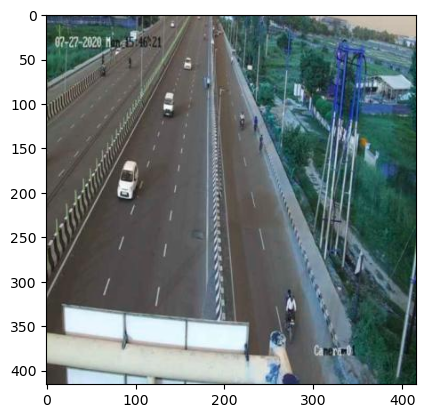

In [20]:
plt.imshow(image)

In [21]:
print(label)# 3 is LCV 
            # 2 is car

[[2.       0.332933 0.245192 0.03125  0.067308]
 [2.       0.225962 0.454327 0.076923 0.125   ]
 [4.       0.530048 0.28726  0.03125  0.069712]
 [4.       0.66226  0.810096 0.050481 0.158654]
 [2.       0.384615 0.138221 0.038462 0.055288]]


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [23]:
sample_image_path = 'Highway_1030_2020-07-30_jpg.rf.c50b303cc63284b063bfa9ed428e9a15.jpg'

In [24]:
import cv2
import numpy as np

 
# Assuming you have loaded the image into the variable img
img = cv2.imread('/kaggle/input/dataset-vehicle1/images'+'/'+sample_image_path)



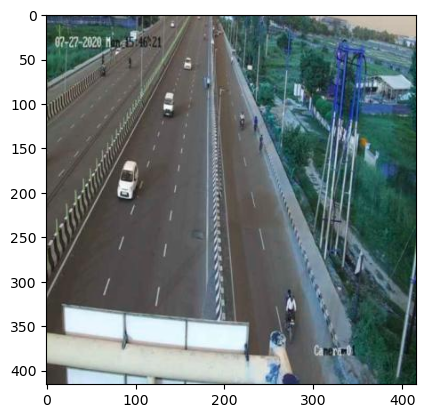

In [25]:
plt.imshow(img)

In [26]:
height, width, _ = img.shape

In [27]:
img.shape

(416, 416, 3)

In [28]:
import cv2
import numpy as np

 
class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[0]

    # Convert normalized values to pixel values
center_x_pixel = int(center_x_normalized * width)
center_y_pixel = int(center_y_normalized * height)
width_pixel = int(width_normalized * width)
height_pixel = int(height_normalized * height)

    # Convert center coordinates to top-left coordinates
top_left_x = center_x_pixel - width_pixel // 2
top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
bottom_right_x = center_x_pixel + width_pixel // 2
bottom_right_y = center_y_pixel + height_pixel // 2

    # Draw bounding box on image
color = (255, 0, 0)  # Green color for bounding box
cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

 

# Display the image with bounding boxes


array([[[ 76,  88, 106],
        [ 68,  80,  98],
        [ 70,  84, 102],
        ...,
        [204, 194, 176],
        [204, 195, 175],
        [204, 195, 175]],

       [[ 55,  67,  85],
        [ 44,  56,  74],
        [ 42,  56,  74],
        ...,
        [204, 194, 176],
        [204, 195, 175],
        [204, 195, 175]],

       [[ 59,  70,  90],
        [ 46,  57,  77],
        [ 39,  53,  71],
        ...,
        [204, 194, 176],
        [204, 195, 175],
        [204, 195, 175]],

       ...,

       [[ 57,  53,  48],
        [ 59,  55,  50],
        [ 62,  58,  53],
        ...,
        [ 10,  48,  30],
        [ 21,  61,  43],
        [ 12,  52,  34]],

       [[ 57,  53,  48],
        [ 59,  55,  50],
        [ 62,  58,  53],
        ...,
        [  7,  45,  27],
        [ 17,  57,  39],
        [ 11,  51,  33]],

       [[ 57,  53,  48],
        [ 59,  55,  50],
        [ 62,  58,  53],
        ...,
        [ 13,  51,  33],
        [ 17,  57,  39],
        [  9,  49,  31]]

In [29]:
print(label[0])

[2.       0.332933 0.245192 0.03125  0.067308]


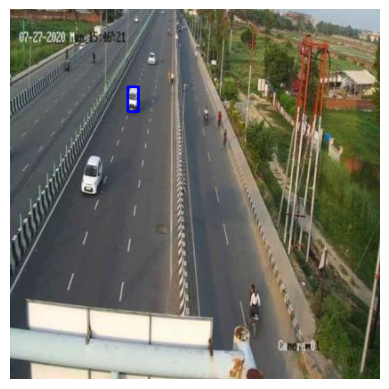

In [30]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# with label[0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

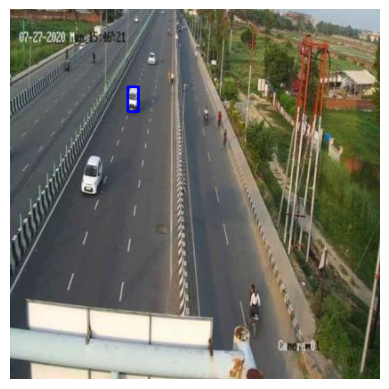

In [31]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# with label[1]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

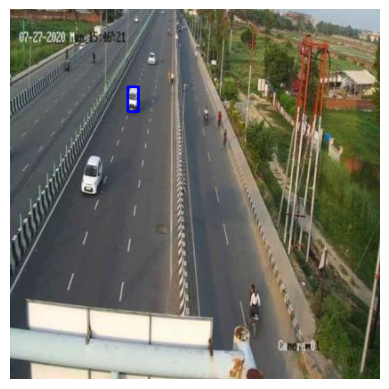

In [32]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# with label[2]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

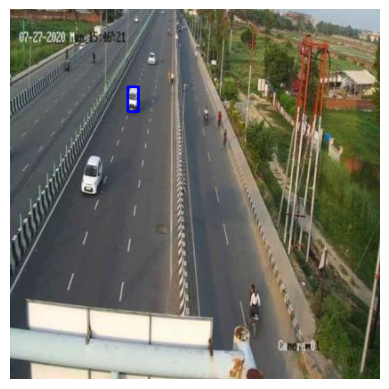

In [33]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# with label[3]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

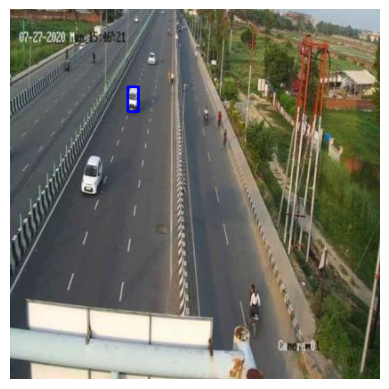

In [34]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# with label[4]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [35]:
label

array([[2.      , 0.332933, 0.245192, 0.03125 , 0.067308],
       [2.      , 0.225962, 0.454327, 0.076923, 0.125   ],
       [4.      , 0.530048, 0.28726 , 0.03125 , 0.069712],
       [4.      , 0.66226 , 0.810096, 0.050481, 0.158654],
       [2.      , 0.384615, 0.138221, 0.038462, 0.055288]], dtype=float32)

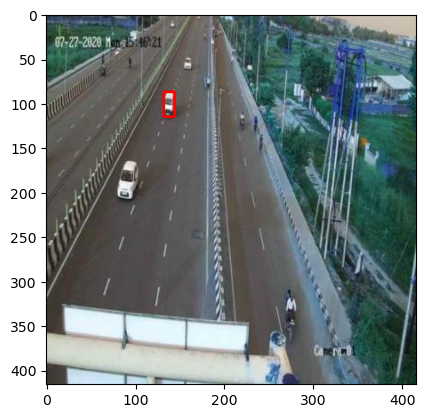

In [36]:
## final image with labels
plt.imshow(img)

In [37]:
Bbox_0 = label[0]

In [38]:
import torchvision.transforms as transforms
from torchvision.transforms import v2

import pathlib

import torch
import torchvision
import pathlib
from collections import defaultdict

import PIL.Image

import torch
import torch.utils.data

import torchvision
from torchvision import models, datasets
import torchvision.transforms.v2 as transforms

/opt/conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [39]:
# source code https://pytorch.org/vision/stable/auto_examples/plot_transforms_v2_e2e.html#sphx-glr-auto-examples-plot-transforms-v2-e2e-py
transform = transforms.Compose(
    [
        transforms.RandomPhotometricDistort(),
        transforms.RandomZoomOut(
            fill=defaultdict(lambda: 0, {PIL.Image.Image: (123, 117, 104)})
        ),
        transforms.RandomIoUCrop(),
        transforms.RandomHorizontalFlip(),
        transforms.ToImageTensor(),
        transforms.ConvertImageDtype(torch.float32),
        transforms.SanitizeBoundingBox(),
    ]
)

In [40]:
import os
import numpy as np

In [41]:
def label_pixels(pixel_values, width, height):
    class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = pixel_values
    
    center_x_pixel = int(center_x_normalized * width)
    center_y_pixel = int(center_y_normalized * height)
    width_pixel = int(width_normalized * width)
    height_pixel = int(height_normalized * height)

    # Convert center coordinates to top-left coordinates
    top_left_x = center_x_pixel - width_pixel // 2
    top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
    bottom_right_x = center_x_pixel + width_pixel // 2
    bottom_right_y = center_y_pixel + height_pixel // 2

    bbox_pascal_voc = [top_left_x, top_left_y, bottom_right_x  ,bottom_right_y  , class_id]

    return [bbox_pascal_voc]

In [42]:
label_pixels(Bbox_0, width, height)

[[132, 87, 144, 115, 2.0]]

In [43]:
Bbox_0

array([2.      , 0.332933, 0.245192, 0.03125 , 0.067308], dtype=float32)

In [44]:
import albumentations as A

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.5),
    # more augmentations as needed
], bbox_params=A.BboxParams(format='pascal_voc'))

# # Example usage
augmented = transform(image=image, bboxes= label_pixels(Bbox_0, width, height))
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


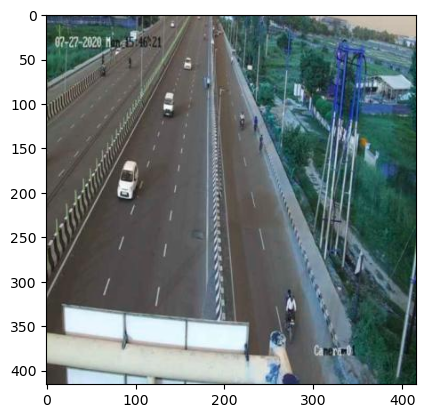

In [45]:
plt.imshow(augmented_image)

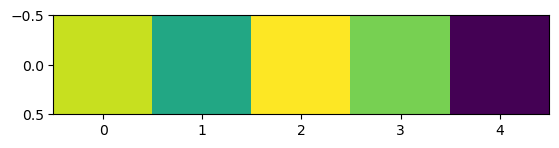

In [46]:
plt.imshow(augmented_bboxes)

In [47]:
print(type(augmented_bboxes))

<class 'list'>


In [48]:
import cv2
import matplotlib.pyplot as plt

def display_image_with_bboxes(img, bboxes, labels=None):
    """
    Display image with bounding boxes using OpenCV.
    img: The image in the format HxWxC
    bboxes: List of bounding boxes in the format [x_min, y_min, x_max, y_max]
    labels: (Optional) List of labels corresponding to each bounding box.
    """
    
    for idx, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, bbox[:-1])
        
        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)

        # If labels are provided, display them above the bounding boxes
        if labels:
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img, str(labels[idx]), (x_min, y_min - 10), font, 0.5, color, 2)

    # Using Matplotlib to display the image, as it handles RGB format
    plt.imshow(img)
    plt.axis('off')
    plt.show()



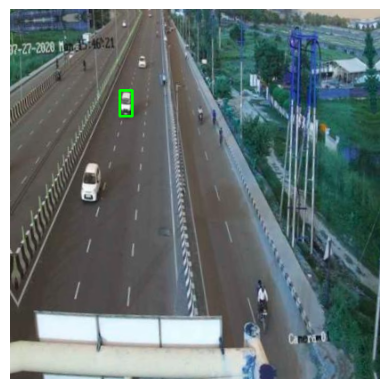

In [49]:
# Example usage
augmented = transform(image=image, bboxes=label_pixels(Bbox_0, width, height))
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']
augmented_labels = augmented.get('labels')  # Will return None if 'labels' key doesn't exist

display_image_with_bboxes(augmented_image, augmented_bboxes)


In [50]:
Bbox_0

array([2.      , 0.332933, 0.245192, 0.03125 , 0.067308], dtype=float32)

In [94]:
import albumentations as A

# Define the augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
    A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
    A.CLAHE(p=0.5),
    A.GridDistortion(p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),

], bbox_params=A.BboxParams(format='pascal_voc'))

# Usage example
# Note: Your bboxes should be in Pascal VOC format [(x_min, y_min, x_max, y_max), ...]
# and the 'labels' list should have the class id for each bbox
augmented = transform(image=image, bboxes=label_pixels(Bbox_0, width, height))
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

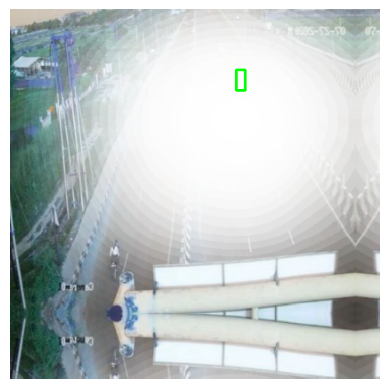

In [52]:
display_image_with_bboxes(augmented_image, augmented_bboxes)

In [53]:
# appending all classes to a single list
full_list = []
for idx, labels_txt in enumerate(labels_data):
    
#     print(labels_txt,'\n')
    for i in range(len(labels_txt)):
        full_list.append(labels_txt[i])

In [54]:
print(full_list[5][0])

3.0


In [55]:
print(labels_data[5][0][0])

2.0


In [56]:
len(labels_data)

8218

In [57]:
labels_path = sorted(os.listdir('/kaggle/input/labels1/labels'))

In [58]:
print(len(labels_path)) # it must be 8218! not 8219

8219


In [59]:
print(labels_path[8218])

ulu9_jpg.rf.d3dcd2359c5b8697fc5b60b95b7c70d9.txt


In [60]:
for i in range(len(labels_path)):
    if labels_path[i] == 'classes.txt':
        print(i)

4411


In [61]:
labels_path[4411]

'classes.txt'

In [62]:
labels_path.remove(labels_path[4411]) ## run it ONLEY ONCE

In [63]:
print(len(labels_path))

8218


In [64]:
# searching for specific class
index_class = []

looking_for_class = 6

# for idx, labels_txt in enumerate(labels_data): ## looping through labels_data
#     for j in range(len(labels_txt)):## looping through each label in labels_data
#         if labels_data[idx][j][0] == looking_for_class:
#             index_class.append(os.listdir(labels_data[idx]))
        
for idx, labels_txt in enumerate(labels_path): ## looping through labels_path (.txt files)
    for j in range(len(labels_data[idx])):## looping through each numpy label in the above .txt file.
        if labels_data[idx][j][0] == looking_for_class: ## this conditions finds the name of class we looking for in .txt format
            index_class.append(labels_txt)
    

In [65]:
print(len(index_class))

171


In [66]:
print(index_class[0]) ## class 6

Highway_1103_2020-07-30_jpg.rf.0a150f9db301d1ddf1c7520645f2fb69.txt


In [67]:
print(len(images_path))

8218


In [68]:
# number of total labels object in the training dataset
print(len(full_list))

26098


In [69]:
for j in range(10):
    print(full_list[j])

[3.       0.509804 0.411765 0.107843 0.245098]
[2.       0.210784 0.616422 0.127451 0.232843]
[0.      0.50375 0.405   0.0975  0.245  ]
[1.      0.19    0.59875 0.12    0.2325 ]
[2.      0.62125 0.61    0.0575  0.125  ]
[3.       0.516169 0.396766 0.10199  0.246269]
[2.       0.205224 0.594527 0.121891 0.233831]
[4.       0.631841 0.597015 0.059701 0.124378]
[2.       0.141827 0.539663 0.110577 0.165865]
[2.       0.360577 0.278846 0.0625   0.086538]


In [70]:
print(type(labels_data[0][0]))

<class 'numpy.ndarray'>


In [71]:
print((labels_data[0][0]))

[3.       0.509804 0.411765 0.107843 0.245098]


In [72]:
print(full_list[0])

[3.       0.509804 0.411765 0.107843 0.245098]


In [73]:
import numpy

In [74]:
from_lis_2_arr = numpy.array(full_list)

In [75]:
from_lis_2_arr[0]

array([3.      , 0.509804, 0.411765, 0.107843, 0.245098], dtype=float32)

In [76]:
print(f" vehicle class {from_lis_2_arr[0][0]}")

 vehicle class 3.0


In [77]:
print(f"number of labeled vehicles {len(from_lis_2_arr)}, the type of the labels {type(from_lis_2_arr)}")

number of labeled vehicles 26098, the type of the labels <class 'numpy.ndarray'>


In [78]:
# searching for specific class
index_class = []

looking_for_class = 2

# for idx, labels_txt in enumerate(labels_data): ## looping through labels_data
#     for j in range(len(labels_txt)):## looping through each label in labels_data
#         if labels_data[idx][j][0] == looking_for_class:
#             index_class.append(os.listdir(labels_data[idx]))
        
for idx, labels_txt in enumerate(labels_path): ## looping through labels_path (.txt files)
    for j in range(len(labels_data[idx])):## looping through each numpy label in the above .txt file.
        if labels_data[idx][j][0] == looking_for_class: ## this conditions finds the name of class we looking for in .txt format
            index_class.append(labels_txt)
    

In [79]:
print(len(index_class))

11425


In [80]:
index_class[4550]

'Highway_350_2020-07-30_jpg.rf.11493f71f8668087c4486ed09698a4c0.txt'

In [143]:
# Example: Access and display a labeled image
# sample_image_path = 'Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'
# sample_image_path = 'Highway_1004_2020-07-30_jpg.rf.0d570034b607a4c2e35ed2b07ea85cab.jpg'
# sample_image_path = 'Highway_102_2020-07-30_jpg.rf.c858a1f662ad63bd60761620095acbc2.jpg'
# sample_image_path = 'Highway_1030_2020-07-30_jpg.rf.cecdb313bdbf5c0d8c44d84306a1c19f.jpg' ## 1 
# sample_image_path = 'Highway_104_2020-07-30_jpg.rf.d066c101b8ec063623caaa020c963526.jpg' ## 2 
# sample_image_path =  'Highway_1060_2020-07-30_jpg.rf.fd16a1752bd05077054a56c2d4f57019.jpg' ## 3
# sample_image_path = 'Highway_1083_2020-07-30_jpg.rf.cdab347e991bf04234a8b14b90b4f757.jpg' ## 4 
# sample_image_path = 'Highway_1095_2020-07-30_jpg.rf.90175313d9acd6f84b44f1ebba767b53.jpg' ## 5
# sample_image_path = 'Highway_1116_2020-07-30_jpg.rf.213d0f1f3ceba86d5f2e585792d3fe68.jpg' ## 6
# sample_image_path = 'Highway_1127_2020-07-30_jpg.rf.fd1fb8a9373e696d920050675927560c.jpg' ## 7 
# sample_image_path = 'Highway_1138_2020-07-30_jpg.rf.6dc94f86edc8d05007a107c965576365.jpg' ## 8 
# sample_image_path = 'Highway_115_2020-07-30_jpg.rf.8dd58eeb54797a3acd2d2d6d44a29269.jpg' ## 8
# sample_image_path = 'Highway_1216_2020-07-30_jpg.rf.5b48f113493621d09f5cab2ed4bdefcb.jpg' ## 9
# sample_image_path = 'Highway_1232_2020-07-30_jpg.rf.dbb25bdf173fe4d5ec842e98e526aee3.jpg' ## 10
# sample_image_path = 'Highway_1269_2020-07-30_jpg.rf.3cbf0646ef5e97ce51bd5f28c7a2fe89.jpg' ## 11
# sample_image_path = 'Highway_1279_2020-07-30_jpg.rf.0e08f773237ee67a03ccc2f6a4974bc9.jpg' ## 12 
# sample_image_path = 'Highway_1343_2020-07-30_jpg.rf.d8b2b6dac63f8e61e1b68adac5904599.jpg' ## 13 

# sample_image_path ='Highway_1385_2020-07-30_jpg.rf.9433d870208e08afc96cf53e6ab21806.jpg' ## 14 
# sample_image_path = 'Highway_142_2020-07-30_jpg.rf.0a1369f10c8fd32c2dcf8fa21b4b2e65.jpg' ## 14
# sample_image_path ='Highway_1443_2020-07-30_jpg.rf.8fe54f7147fe37ac563df4439743eb3e.jpg' ## 15
 
sample_image_path = 'Highway_350_2020-07-30_jpg.rf.11493f71f8668087c4486ed09698a4c0.jpg'
sample_data = labeled_images[sample_image_path]

image = sample_data['image']
label = sample_data['label']

import cv2
import numpy as np

 
# Assuming you have loaded the image into the variable img
img = cv2.imread('/kaggle/input/dataset-vehicle1/images'+'/'+sample_image_path)


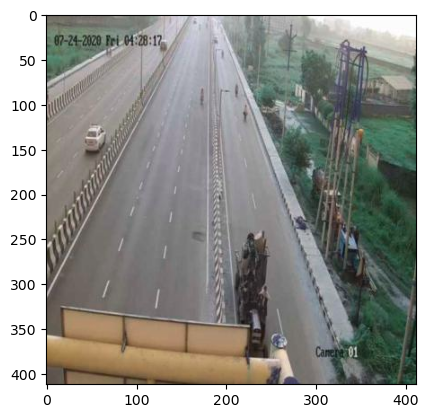

In [145]:
plt.imshow(img)

In [82]:
 list(labeled_images.keys()).index(sample_image_path) ## checking the key value index of the above

2704

In [83]:
labels_path = sorted(os.listdir('/kaggle/input/labels1/labels'))

In [84]:
labels_path[2704]

'Highway_350_2020-07-30_jpg.rf.11493f71f8668087c4486ed09698a4c0.txt'

In [85]:
images_path[2704] ## both image and label matching. 

'Highway_350_2020-07-30_jpg.rf.11493f71f8668087c4486ed09698a4c0.jpg'

In [86]:
print(type(labeled_images))

<class 'dict'>


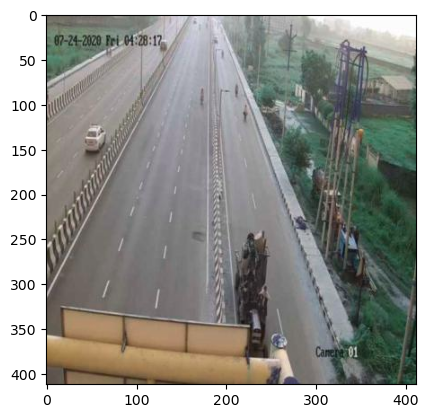

In [87]:
plt.imshow(img)

In [88]:
print(len(label))

10


In [89]:
label[0]

array([2.      , 0.196875, 0.4375  , 0.053125, 0.096875], dtype=float32)

In [90]:
(labels_data[2])

array([[3.      , 0.516169, 0.396766, 0.10199 , 0.246269],
       [2.      , 0.205224, 0.594527, 0.121891, 0.233831],
       [4.      , 0.631841, 0.597015, 0.059701, 0.124378]], dtype=float32)

In [91]:
shape = img.shape

In [92]:

for label in labels_data:
    for j in range(len(label))
            class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[j]
            center_x_pixel = int(center_x_normalized * shape[0])
            center_y_pixel = int(center_y_normalized * shape[1])
            width_pixel = int(width_normalized * shape[0])
            height_pixel = int(height_normalized * shape[1])
            top_left_x = center_x_pixel - width_pixel // 2
            top_left_y = center_y_pixel - height_pixel // 2
            bottom_right_x = center_x_pixel + width_pixel // 2
            bottom_right_y = center_y_pixel + height_pixel // 2

            # Extract the region inside the bounding box
            region = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

In [139]:
images_path[2704]

'Highway_350_2020-07-30_jpg.rf.11493f71f8668087c4486ed09698a4c0.jpg'

In [138]:
labels_data[2704]

array([[2.      , 0.196875, 0.4375  , 0.053125, 0.096875],
       [2.      , 0.166406, 0.658594, 0.079688, 0.160938],
       [2.      , 0.491406, 0.588281, 0.064063, 0.139063],
       [4.      , 0.501563, 0.425   , 0.03125 , 0.078125],
       [2.      , 0.248438, 0.299219, 0.040625, 0.057813],
       [2.      , 0.299219, 0.272656, 0.035938, 0.057813],
       [2.      , 0.019531, 0.471875, 0.035938, 0.1     ],
       [1.      , 0.059375, 0.849219, 0.115625, 0.301563],
       [1.      , 0.272656, 0.488281, 0.101562, 0.264063],
       [2.      , 0.483594, 0.328906, 0.039062, 0.073438]], dtype=float32)

In [ ]:
# labeled_images = {}

# for i, image_path in enumerate(images_path):
#     new_dir = '/kaggle/input/dataset-vehicle1/images'+'/'+image_path
#     image = cv2.imread(new_dir)
#     label = labels_data[i] 
# #     elif i >= 5694:
# #         image = cv2.imread(image_path)
# #         label = labels[i+1]  # Get the corresponding label from the loaded labels array

#     labeled_images[image_path] = {'image': image, 'label': label}

In [97]:
labels_path[0]

'Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.txt'

In [98]:
type(images_path)

list

In [99]:
type(labels_path)

list

In [100]:
len(labels_data)

8218

In [101]:
len(labels_path)

8219

In [102]:
labels_path[4411]

'classes.txt'

In [103]:
labels_path.remove(labels_path[4411])

In [104]:
labels_path[4411]

'highway_2500_2020-08-26.txt'

In [105]:
len(labels_path)

8218

In [121]:
# labeled = {}
# for idx, txt_format enumerate(labels_path):
#     txt_f = '/kaggle/input/labels1'+'/'+txt_format
#     npy_f = labels_data[idx]
    
#     labeled = {'txt_file_name': txt_f, 'npy_file_name': npy_f}
    
# labeled = {}
# for idx, txt_format in enumerate(labels_path):
#     txt_f = '/kaggle/input/labels1'+'/'+txt_format
#     npy_f = labels_data[idx]
    
#     labeled[txt_format] = {'txt_file_name': txt_f, 'npy_file_name': npy_f}## txt_f and npy_f full path
 

In [175]:
def iteration():
    
    for label in labels_data:
        for j in range(len(label)):
                class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[j]
                center_x_pixel = int(center_x_normalized * shape[0])
                center_y_pixel = int(center_y_normalized * shape[1])
                width_pixel = int(width_normalized * shape[0])
                height_pixel = int(height_normalized * shape[1])
                top_left_x = center_x_pixel - width_pixel // 2
                top_left_y = center_y_pixel - height_pixel // 2
                bottom_right_x = center_x_pixel + width_pixel // 2
                bottom_right_y = center_y_pixel + height_pixel // 2

                # Extract the region inside the bounding box
                region = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
                return region, 

In [176]:
is_road(iteration())

True

In [173]:
def is_road(region, threshold=0.6):
 
    gray = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
    road_intensity = gray.mean()
    
    # define the range of road intensity. Adjust these values based on your dataset.
    lower_bound = 100
    upper_bound = 200
    
    is_road_result = lower_bound <= road_intensity <= upper_bound

    # print the result along with the average intensity for debugging
#     print(f"Average Intensity: {road_intensity:.2f}, Is Road: {is_road_result}")

    return is_road_result

In [178]:
print(len(filter_mislabeled_images(image_dir= images_path, shape= img.shape)))

0


In [169]:
def filter_mislabeled_images(image_dir, shape):
  
    mislabeled_files = []
    
    for filename in (image_dir):
#         image_path = os.path.join(image_dir, filename)
        
        image = cv2.imread('/kaggle/input/dataset-vehicle1/images'+'/'+filename)


        # Load labels from the .npy file
        labels = labels_data
        
        mislabeled_boxes = 0

        for label in labels:
            for j in range(len(label)):
                class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[j]
                center_x_pixel = int(center_x_normalized * shape[0])
                center_y_pixel = int(center_y_normalized * shape[1])
                width_pixel = int(width_normalized * shape[0])
                height_pixel = int(height_normalized * shape[1])
                top_left_x = center_x_pixel - width_pixel // 2
                top_left_y = center_y_pixel - height_pixel // 2
                bottom_right_x = center_x_pixel + width_pixel // 2
                bottom_right_y = center_y_pixel + height_pixel // 2

                # Extract the region inside the bounding box
                region = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

                # Check if the region is primarily a road
                if is_road(region):
                    mislabeled_boxes += 1

            # If all bounding boxes in the image are mislabeled, mark the image as mislabeled
            if mislabeled_boxes == len(labels):
                mislabeled_files.append(filename)
               

        return mislabeled_files



In [113]:
img.shape

(412, 412, 3)

In [119]:
len(label)

5

In [146]:
label

array([[2.      , 0.196875, 0.4375  , 0.053125, 0.096875],
       [2.      , 0.166406, 0.658594, 0.079688, 0.160938],
       [2.      , 0.491406, 0.588281, 0.064063, 0.139063],
       [4.      , 0.501563, 0.425   , 0.03125 , 0.078125],
       [2.      , 0.248438, 0.299219, 0.040625, 0.057813],
       [2.      , 0.299219, 0.272656, 0.035938, 0.057813],
       [2.      , 0.019531, 0.471875, 0.035938, 0.1     ],
       [1.      , 0.059375, 0.849219, 0.115625, 0.301563],
       [1.      , 0.272656, 0.488281, 0.101562, 0.264063],
       [2.      , 0.483594, 0.328906, 0.039062, 0.073438]], dtype=float32)

In [147]:
import cv2
import numpy as np

def label_pixels_looping(image, shape, number_of_labels, label):
    values = []
    class_ids = []
   
    
    for i in range (number_of_labels): 
        class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[i]
        img = image
        # Convert normalized values to pixel values
        center_x_pixel = int(center_x_normalized * shape[0])# width
        center_y_pixel = int(center_y_normalized * shape[1])# height
        width_pixel = int(width_normalized * shape[0])
        height_pixel = int(height_normalized * shape[1])

        # Convert center coordinates to top-left coordinates
        top_left_x = center_x_pixel - width_pixel // 2
        top_left_y = center_y_pixel - height_pixel // 2

        # Convert center coordinates to bottom-right coordinates
        bottom_right_x = center_x_pixel + width_pixel // 2
        bottom_right_y = center_y_pixel + height_pixel // 2

        # Draw bounding box on image
        color = (255, 0, 0)  # Green color for bounding box
        cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)
        values.append(img)
        class_ids.append(class_id)
        
    return img, class_ids
    

In [148]:
img, class_id = label_pixels_looping(image= img, shape= img.shape , number_of_labels= len(label), label= label)

In [149]:
class_id

[2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0]

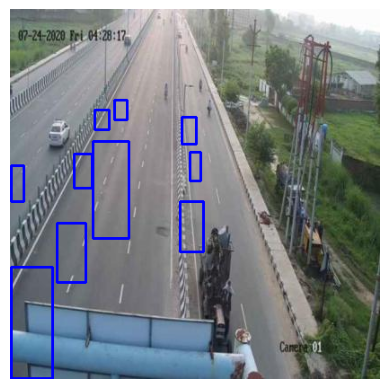

In [150]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()## 

# **Training the neural network**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms